In [37]:
import torch
from torchvision import datasets,transforms
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [38]:
TRANSFORMS = [
        transforms.Pad(2),
        transforms.ToTensor(),
    ]

dataset_tranforms = transforms.Compose(TRANSFORMS)

In [39]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=dataset_tranforms)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=dataset_tranforms)

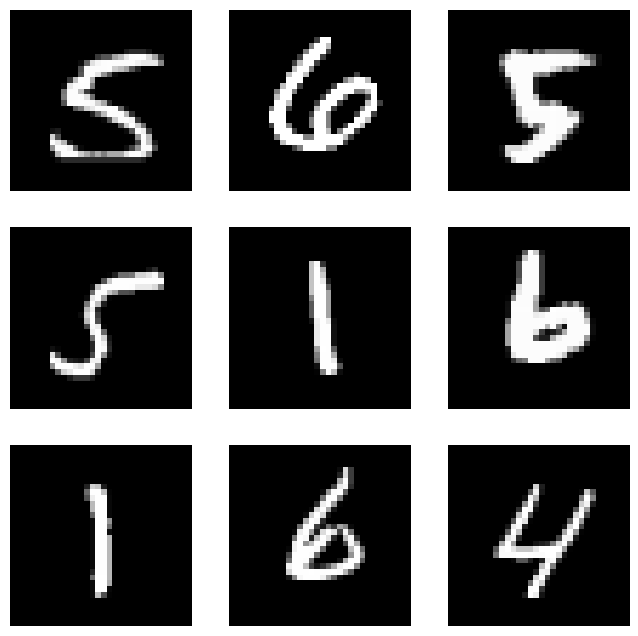

In [40]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_trainset), size=(1,)).item()
    img, label = mnist_trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [41]:
class TransformedDataset(Dataset):
    '''To modify an existing dataset with a transform.
    This is useful for creating different permutations of MNIST without loading the data multiple times.'''

    def __init__(self, original_dataset, transform=None, target_transform=None):
        super().__init__()
        self.dataset = original_dataset
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        (input, target) = self.dataset[index]
        if self.transform:
            input = self.transform(input)
        if self.target_transform:
            target = self.target_transform(target)
        return (input, target)


def permute_train_test_data(trainset,testset) :
        # get train and test datasets
        mnist_trainset = trainset
        mnist_testset = testset

        # generate pixel-permutations
        permutations = [np.random.permutation(32**2) for _ in range(10)]
        # specify transformed datasets per context
        train_datasets = []
        test_datasets = []
        for perm in enumerate(permutations):
            target_transform = None
            train_datasets.append(TransformedDataset(
                mnist_trainset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))
            test_datasets.append(TransformedDataset(
                mnist_testset, transform=transforms.Lambda(lambda x, p=perm: permutate_image_pixels(x, p)),
                target_transform=target_transform
            ))

        return train_datasets, test_datasets